# 1.10. 决策树

**Decision Trees (DTs)** 是一种用来 [classification](#1101-分类) 和 [regression](#1102-回归) 的无参监督学习方法。其目的是创建一种模型从数据特征中学习简单的决策规则来预测一个目标变量的值。

例如，在下面的图片中，决策树通过if-then-else的决策规则来学习数据从而估测数一个正弦图像。决策树越深入，决策规则就越复杂并且对数据的拟合越好。

[![http://sklearn.apachecn.org/cn/0.19.0/_images/sphx_glr_plot_tree_regression_0011.png](img/f0b72920659961ba27aec1da59f3019c.jpg)](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

决策树的优势:

*   便于理解和解释。树的结构可以可视化出来。

*   训练需要的数据少。其他机器学习模型通常需要数据规范化，比如构建虚拟变量和移除缺失值,不过请注意，这种模型不支持缺失值。
*   由于训练决策树的数据点的数量导致了决策树的使用开销呈指数分布(训练树模型的时间复杂度是参与训练数据点的对数值)。
*   能够处理数值型数据和分类数据。其他的技术通常只能用来专门分析某一种变量类型的数据集。详情请参阅算法。
*   能够处理多路输出的问题。
*   使用白盒模型。如果某种给定的情况在该模型中是可以观察的，那么就可以轻易的通过布尔逻辑来解释这种情况。相比之下，在黑盒模型中的结果就是很难说明清 楚地。
*   可以通过数值统计测试来验证该模型。这对事解释验证该模型的可靠性成为可能。
*   即使该模型假设的结果与真实模型所提供的数据有些违反，其表现依旧良好。

决策树的缺点包括:

*   决策树模型容易产生一个过于复杂的模型,这样的模型对数据的泛化性能会很差。这就是所谓的过拟合.一些策略像剪枝、设置叶节点所需的最小样本数或设置数的最大深度是避免出现 该问题最为有效地方法。
*   决策树可能是不稳定的，因为数据中的微小变化可能会导致完全不同的树生成。这个问题可以通过决策树的集成来得到缓解
*   在多方面性能最优和简单化概念的要求下，学习一棵最优决策树通常是一个NP难问题。因此，实际的决策树学习算法是基于启发式算法，例如在每个节点进 行局部最优决策的贪心算法。这样的算法不能保证返回全局最优决策树。这个问题可以通过集成学习来训练多棵决策树来缓解,这多棵决策树一般通过对特征和样本有放回的随机采样来生成。
*   有些概念很难被决策树学习到,因为决策树很难清楚的表述这些概念。例如XOR，奇偶或者复用器的问题。
*   如果某些类在问题中占主导地位会使得创建的决策树有偏差。因此，我们建议在拟合前先对数据集进行平衡。

## 1.10.1. 分类

[`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier "sklearn.tree.DecisionTreeClassifier") 是能够在数据集上执行多分类的类,与其他分类器一样，[`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier "sklearn.tree.DecisionTreeClassifier") 采用输入两个数组：数组X，用 `[n_samples, n_features]` 的方式来存放训练样本。整数值数组Y，用 `[n_samples]` 来保存训练样本的类标签:

In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

执行通过之后，可以使用该模型来预测样本类别:

In [2]:
clf.predict([[2., 2.]])

array([1])

另外，也可以预测每个类的概率，这个概率是叶中相同类的训练样本的分数:

In [3]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

[`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier "sklearn.tree.DecisionTreeClassifier") 既能用于二分类（其中标签为[-1,1]）也能用于多分类（其中标签为[0,…,k-1]）。使用Lris数据集，我们可以构造一个决策树，如下所示:

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

经过训练，我们可以使用 [`export_graphviz`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz "sklearn.tree.export_graphviz") 导出器以 [Graphviz](http://www.graphviz.org/) 格式导出决策树. 如果你是用 [conda](http://conda.io) 来管理包，那么安装 graphviz 二进制文件和 python 包可以用以下指令安装

```sh
 conda install python-graphviz
```

或者，可以从 graphviz 项目主页下载 graphviz 的二进制文件，并从 pypi 安装: Python 包装器，并安装 ```pip install graphviz``` .以下是在整个 iris 数据集上训练的上述树的 graphviz 导出示例; 其结果被保存在 *iris.pdf* 中:

In [5]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

`export_graphviz` 还支持各种美化，包括通过他们的类着色节点（或回归值），如果需要，还能使用显式变量和类名。Jupyter notebook也可以自动内联式渲染这些绘制节点:

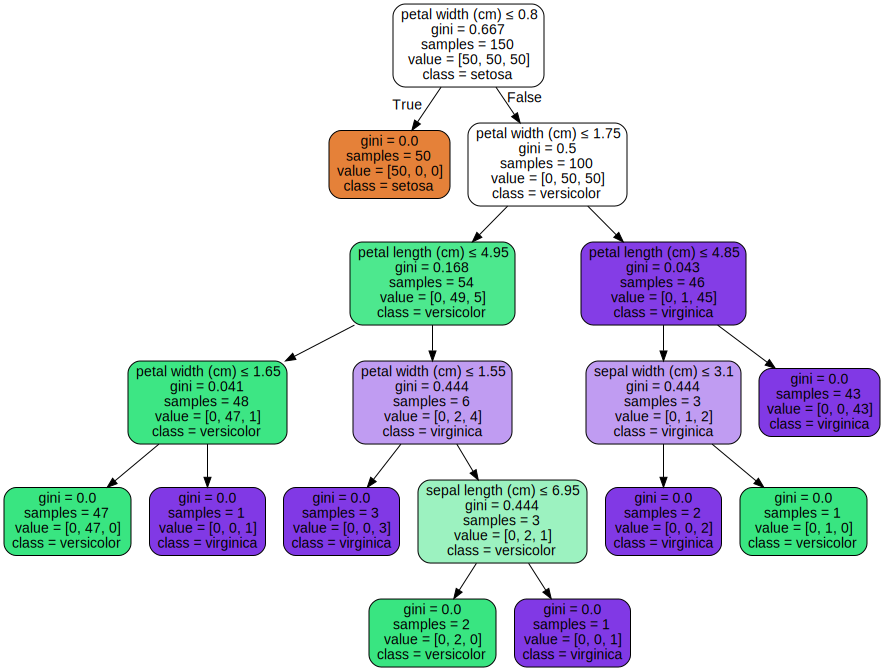

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None,
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph



[![http://sklearn.apachecn.org/cn/0.19.0/_images/sphx_glr_plot_iris_0013.png](img/cba233fc4178da6d3fe0b177cbbb6318.jpg)](https://scikit-learn.org/stable/auto_examples/tree/plot_iris.html)

> **示例**:
>
> *   [Plot the decision surface of a decision tree on the iris dataset](https://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py)

## 1.10.2. 回归

[![http://sklearn.apachecn.org/cn/0.19.0/_images/sphx_glr_plot_tree_regression_0011.png](img/f0b72920659961ba27aec1da59f3019c.jpg)](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

决策树通过使用 [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor "sklearn.tree.DecisionTreeRegressor") 类也可以用来解决回归问题。如在分类设置中，拟合方法将数组X和数组y作为参数，只有在这种情况下，y数组预期才是浮点值:

In [7]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

> **示例**:
>
> *   [Decision Tree Regression](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py)

## 1.10.3. 多值输出问题

一个多值输出问题是一个类似当 Y 是大小为 `[n_samples, n_outputs]` 的2d数组时，有多个输出值需要预测的监督学习问题。

当输出值之间没有关联时，一个很简单的处理该类型的方法是建立一个n独立模型，即每个模型对应一个输出，然后使用这些模型来独立地预测n个输出中的每一个。然而，由于可能与相同输入相关的输出值本身是相关的，所以通常更好的方法是构建能够同时预测所有n个输出的单个模型。首先，因为仅仅是建立了一个模型所以训练时间会更短。第二，最终模型的泛化性能也会有所提升。对于决策树，这一策略可以很容易地用于多输出问题。 这需要以下更改：

*   在叶中存储n个输出值，而不是一个;
*   通过计算所有n个输出的平均减少量来作为分裂标准.

该模块通过在 `DecisionTreeClassifier `和 `DecisionTreeRegressor` 中实现该策略来支持多输出问题。如果决策树与大小为 `[n_samples, n_outputs]` 的输出数组Y向匹配，则得到的估计器:

* ``predict`` 是输出n_output的值
* 在 ``predict_proba`` 上输出 n_output 数组列表

用多输出决策树进行回归分析 [Multi-output Decision Tree Regression](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression_multioutput.html#sphx-glr-auto-examples-tree-plot-tree-regression-multioutput-py) 。 在该示例中，输入X是单个实数值，并且输出Y是X的正弦和余弦。

[![http://sklearn.apachecn.org/cn/0.19.0/_images/sphx_glr_plot_tree_regression_multioutput_0011.png](img/c6b27df44672e7fa50d1d81ffbbebfbd.jpg)](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression_multioutput.html)

使用多输出树进行分类，在 [Face completion with a multi-output estimators](https://scikit-learn.org/stable/auto_examples/plot_multioutput_face_completion.html#sphx-glr-auto-examples-plot-multioutput-face-completion-py) 中进行了演示。 在该示例中，输入X是面的上半部分的像素，并且输出Y是这些面的下半部分的像素。

![sphx_glr_plot_multioutput_face_completion_0011](img/sphx_glr_plot_multioutput_face_completion_0011.png)

> **示例**:
>
> *   [Multi-output Decision Tree Regression](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression_multioutput.html#sphx-glr-auto-examples-tree-plot-tree-regression-multioutput-py)
> *   [Face completion with a multi-output estimators](https://scikit-learn.org/stable/auto_examples/plot_multioutput_face_completion.html#sphx-glr-auto-examples-plot-multioutput-face-completion-py)

> **参考资料**:
>
> *   M. Dumont et al, [Fast multi-class image annotation with random subwindows and multiple output randomized trees](http://www.montefiore.ulg.ac.be/services/stochastic/pubs/2009/DMWG09/dumont-visapp09-shortpaper.pdf), International Conference on Computer Vision Theory and Applications 2009

## 1.10.4. 复杂度分析

总体来说，用来构建平衡二叉树的运行时间为 ![O(n_{samples}n_{features}\log(n_{samples}))](img/264ba68c53c2e2867b9e307e8b940d49.jpg) 查询时间为 ![O(\log(n_{samples}))](img/ec29f705a6be2ce512a10c266dd755f0.jpg) 。尽管树的构造算法尝试生成平衡树，但它们并不总能保持平衡。假设子树能大概保持平衡，每个节点的成本包括通过 ![O(n_{features})](img/92570652e9c52768c76f5b9cf8f97a28.jpg) 时间复杂度来搜索找到提供熵减小最大的特征。每个节点的花费为 ![O(n_{features}n_{samples}\log(n_{samples}))](img/6c8db7614197ace6a4bf0f437c085e6d.jpg) ，从而使得整个决策树的构造成本为 ![O(n_{features}n_{samples}^{2}\log(n_{samples}))](img/2bf67de05d37f31bd2154fdc96690102.jpg) 。

Scikit-learn提供了更多有效的方法来创建决策树。初始实现（如上所述）将重新计算沿着给定特征的每个新分割点的类标签直方图（用于分类）或平均值（用于回归）。与分类所有的样本特征，然后再次训练时运行标签计数，可将每个节点的复杂度降低为 ![O(n_{features}\log(n_{samples}))](img/93cdc140e4de4cbb0d093fc7ad5c6a36.jpg) ，则总的成本花费为 ![O(n_{features}n_{samples}\log(n_{samples}))](img/6c8db7614197ace6a4bf0f437c085e6d.jpg) 。这是一种对所有基于树的算法的改进选项。默认情况下，对于梯度提升模型该算法是打开的，一般来说它会让训练速度更快。但对于所有其他算法默认是关闭的，当训练深度很深的树时往往会减慢训练速度。

## 1.10.5. 实际使用技巧

*   对于拥有大量特征的数据决策树会出现过拟合的现象。获得一个合适的样本比例和特征数量十分重要，因为在高维空间中只有少量的样本的树是十分容易过拟合的。
*   考虑事先进行降维( [PCA](decomposition.html#pca) , [ICA](decomposition.html#ica) ，使您的树更好地找到具有分辨性的特征。
*   通过 `export` 功能可以可视化您的决策树。使用 `max_depth=3` 作为初始树深度，让决策树知道如何适应您的数据，然后再增加树的深度。
*   请记住，填充树的样本数量会增加树的每个附加级别。使用 `max_depth` 来控制输的大小防止过拟合。
*   通过使用 `min_samples_split` 和 `min_samples_leaf` 来控制叶节点上的样本数量。当这个值很小时意味着生成的决策树将会过拟合，然而当这个值很大时将会不利于决策树的对样本的学习。所以尝试 `min_samples_leaf=5` 作为初始值。如果样本的变化量很大，可以使用浮点数作为这两个参数中的百分比。两者之间的主要区别在于 `min_samples_leaf` 保证叶结点中最少的采样数，而 `min_samples_split` 可以创建任意小的叶子，尽管在文献中 `min_samples_split` 更常见。
*   在训练之前平衡您的数据集，以防止决策树偏向于主导类.可以通过从每个类中抽取相等数量的样本来进行类平衡，或者优选地通过将每个类的样本权重 (`sample_weight`) 的和归一化为相同的值。还要注意的是，基于权重的预修剪标准 (`min_weight_fraction_leaf`) 对于显性类别的偏倚偏小，而不是不了解样本权重的标准，如 `min_samples_leaf` 。
*   如果样本被加权，则使用基于权重的预修剪标准 `min_weight_fraction_leaf` 来优化树结构将更容易，这确保叶节点包含样本权重的总和的至少一部分。
*   所有的决策树内部使用 `np.float32` 数组 ，如果训练数据不是这种格式，将会复制数据集。
*   如果输入的矩阵X为稀疏矩阵，建议您在调用fit之前将矩阵X转换为稀疏的``csc_matrix`` ,在调用predict之前将 `csr_matrix` 稀疏。当特征在大多数样本中具有零值时，与密集矩阵相比，稀疏矩阵输入的训练时间可以快几个数量级。

## 1.10.6. 决策树算法: ID3, C4.5, C5.0 和 CART

所有种类的决策树算法有哪些以及它们之间的区别？scikit-learn 中实现何种算法呢？

[ID3](https://en.wikipedia.org/wiki/ID3_algorithm)（Iterative Dichotomiser 3）由 Ross Quinlan 在1986年提出。该算法创建一个多路树，找到每个节点（即以贪心的方式）分类特征，这将产生分类目标的最大信息增益。决策树发展到其最大尺寸，然后通常利用剪枝来提高树对未知数据的泛华能力。

C4.5 是 ID3 的后继者，并且通过动态定义将连续属性值分割成一组离散间隔的离散属性（基于数字变量），消除了特征必须被明确分类的限制。C4.5 将训练的树（即，ID3算法的输出）转换成 if-then 规则的集合。然后评估每个规则的这些准确性，以确定应用它们的顺序。如果规则的准确性没有改变，则需要决策树的树枝来解决。

C5.0 是 Quinlan 根据专有许可证发布的最新版本。它使用更少的内存，并建立比 C4.5 更小的规则集，同时更准确。

[CART](https://en.wikipedia.org/wiki/Predictive_analytics#Classification_and_regression_trees_.28CART.29)（Classification and Regression Trees （分类和回归树））与 C4.5 非常相似，但它不同之处在于它支持数值目标变量（回归），并且不计算规则集。CART 使用在每个节点产生最大信息增益的特征和阈值来构造二叉树。

scikit-learn 使用 CART 算法的优化版本。

## 1.10.7. 数学表达

给定训练向量 ![x_i \in R^n](img/02848ebe72029503696b6523e4052c0c.jpg), i=1,…, l 和标签向量 ![y \in R^l](img/405095229d24f3525298dc6f99077666.jpg)。决策树递归地分割空间，例如将有相同标签的样本归为一组。

将 ![m](img/94156b879a7455cb0d516efa9c9c0991.jpg) 节点上的数据用 ![Q](img/87dfb2676632ee8a92713f4861ccc84e.jpg) 来表示。每一个候选组 ![\theta = (j, t_m)](img/c3567127ff1f678758b338a50e9c4880.jpg) 包含一个特征 ![j](img/7b215f2882ce8aaa33a97e43ad626314.jpg) 和阈值 ![t_m](img/264dc5b617a5aa98151c4ea6975e9a90.jpg) 将,数据分成 ![Q_{left}(\theta)](img/32246af90101d1607825a589ebea6880.jpg) 和 ![Q_{right}(\theta)](img/6c70b46b88f05e00e292f1a0f98d2aa8.jpg) 子集。


![Q_{left}(\theta) = {(x, y) | x_j &lt;= t_m}Q_{right}(\theta) = Q \setminusQ_{left}(\theta)](img/d5a26fae0e652d4e951d9ec9ae1a01e5.jpg)


使用不纯度函数 ![H()](img/b382a1d99ddfadf17b35d32b0b156b5b.jpg) 计算 ![m](img/94156b879a7455cb0d516efa9c9c0991.jpg) 处的不纯度,其选择取决于正在解决的任务（分类或回归）

![G(Q, \theta) = \frac{n_{left}}{N_m} H(Q_{left}(\theta))+ \frac{n_{right}}{N_m}H(Q_{right}(\theta))](img/c57c1c5b116586e218fdaa3d0696d246.jpg)

选择使不纯度最小化的参数

![\theta^* = \operatorname{argmin}_\theta  G(Q, \theta)](img/af78ae4aadd0f0961cf4d9564897b1ff.jpg)

在 ![Q_{left}(\theta^*)](img/33eb0dacfcc0df16c84bfaed52d31859.jpg) 和 ![Q_{right}(\theta^*)](img/a1bd06d03e764db224f0e10b4f024bdd.jpg) 上递归运算，直到达到最大允许深度，![N_m &lt; \min_{samples}](img/0fec9d3a9833abc417480a03be883b3e.jpg) 或 ![N_m = 1](img/be71aa00cd62f24b4657f7993d1b3a45.jpg)。

### 1.10.7.1. 分类标准

对于节点 ![m](img/94156b879a7455cb0d516efa9c9c0991.jpg) ，表示具有 ![N_m](img/ee68d82006856c6355aa0dca42cd5054.jpg) 个观测值的区域 ![R_m](img/018a312145ba4dee4c257135644ced91.jpg) ，如果分类结果采用值是 0,1,…,K-1 的值，让

![p_{mk} = 1/ N_m \sum_{x_i \in R_m} I(y_i = k)](img/17430579d0bcbef3e2d99eba470792c8.jpg)

是节点 ![m](img/94156b879a7455cb0d516efa9c9c0991.jpg) 中k类观测的比例通常用来处理杂质的方法是Gini

![H(X_m) = \sum_k p_{mk} (1 - p_{mk})](img/c236b4ae30d04ba7fae7fa499a2ba9ea.jpg)

Cross-Entropy （交叉熵）

![H(X_m) = - \sum_k p_{mk} \log(p_{mk})](img/a539f6901c50549f8d30f6d7f6f3e177.jpg)

和 Misclassification （错误分类）

![H(X_m) = 1 - \max(p_{mk})](img/b146555411b22bcf0ad73d4720455038.jpg)

在 ![X_m](img/fe5ed835e0d3407e3f2d694d8bc049a1.jpg) 训练 ![m](img/94156b879a7455cb0d516efa9c9c0991.jpg) 节点上的数据时。

### 1.10.7.2. 回归标准

如果目标是连续性的值，那么对于节点 ![m](img/94156b879a7455cb0d516efa9c9c0991.jpg) ,表示具有 ![N_m](img/ee68d82006856c6355aa0dca42cd5054.jpg) 个观测值的区域 ![R_m](img/018a312145ba4dee4c257135644ced91.jpg) ，对于以后的分裂节点的位置的决定常用的最小化标准是均方差和平均绝对误差，前者使用终端节点处的平均值来最小化L2误差，后者使用终端节点处的中值来最小化 L1 误差。

Mean Squared Error （均方误差）:


![c_m = \frac{1}{N_m} \sum_{i \in N_m} y_i
H(X_m) = \frac{1}{N_m} \sum_{i \in N_m} (y_i - c_m)^2](img/0cd05229735908f0f99e59deb90a4434.jpg)


Mean Absolute Error（平均绝对误差）:


![\bar{y_m} = \frac{1}{N_m} \sum_{i \in N_m} y_i
H(X_m) = \frac{1}{N_m} \sum_{i \in N_m} |y_i - \bar{y_m}|](img/3b70a99c882760b6d8ed230e145ed742.jpg)


在 ![X_m](img/fe5ed835e0d3407e3f2d694d8bc049a1.jpg) 训练 ![m](img/94156b879a7455cb0d516efa9c9c0991.jpg) 节点上的数据时。

> **示例**:
>
> *   [https://en.wikipedia.org/wiki/Decision_tree_learning](https://en.wikipedia.org/wiki/Decision_tree_learning)
> *   [https://en.wikipedia.org/wiki/Predictive_analytics](https://en.wikipedia.org/wiki/Predictive_analytics)
> *   L. Breiman, J. Friedman, R. Olshen, and C. Stone. Classification and Regression Trees. Wadsworth, Belmont, CA, 1984.
> *   J.R. Quinlan. C4. 5: programs for machine learning. Morgan Kaufmann, 1993.
> *   T. Hastie, R. Tibshirani and J. Friedman. Elements of Statistical Learning, Springer, 2009.